In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim


In [ ]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)

test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transform)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)


100%|██████████| 9912422/9912422 [00:00<00:00, 157115960.53it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

100%|██████████| 28881/28881 [00:00<00:00, 10890559.55it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 45374207.92it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 4282942.62it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



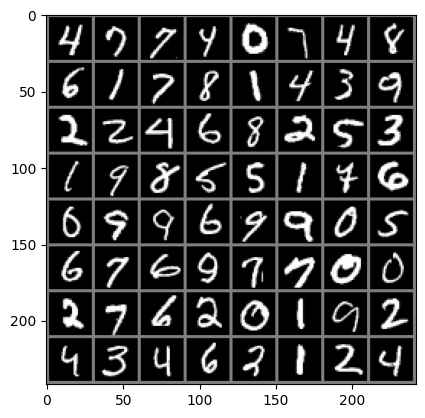

    4     7     7     4


In [ ]:
def imshow(img):
    img = img / 2 + 0.5  # Unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Show some random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)
imshow(torchvision.utils.make_grid(images))
print(' '.join(f'{labels[j]:5}' for j in range(4)))


In [ ]:
#Designing the Neural Network Model
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)  # Flatten the input
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = Net()


In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
num_epochs = 10


In [ ]:
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f'Epoch {epoch + 1}, Loss: {running_loss / len(train_loader)}')


Epoch 1, Loss: 1.0678822724803934
Epoch 2, Loss: 0.3815559100653571
Epoch 3, Loss: 0.32428391123694905
Epoch 4, Loss: 0.2944126565938692
Epoch 5, Loss: 0.26965130816326977
Epoch 6, Loss: 0.2483940406569413
Epoch 7, Loss: 0.22888531219333347
Epoch 8, Loss: 0.20942900032361053
Epoch 9, Loss: 0.19324801165435804
Epoch 10, Loss: 0.17838598375143147


In [ ]:
#evaluate the model
correct = 0
total = 0
all_labels = []
all_predictions = []

with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        all_labels.extend(labels)
        all_predictions.extend(predicted)

accuracy = 100 * correct / total

from sklearn.metrics import confusion_matrix, classification_report

classification_rep = classification_report(all_labels, all_predictions)

print(f'Accuracy: {accuracy}%')
print('Classification Report:')
print(classification_rep)


Accuracy: 94.88%
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       980
           1       0.97      0.98      0.98      1135
           2       0.95      0.95      0.95      1032
           3       0.93      0.96      0.94      1010
           4       0.95      0.94      0.95       982
           5       0.96      0.91      0.93       892
           6       0.95      0.96      0.95       958
           7       0.96      0.94      0.95      1028
           8       0.93      0.94      0.94       974
           9       0.93      0.93      0.93      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000



The code showcases a comprehensive workflow for training and evaluating a feedforward neural network on the MNIST handwritten digit classification task. It demonstrates how to load and preprocess the dataset, design a neural network architecture, set hyperparameters and an optimizer, perform training, and assess the model's performance using multiple evaluation metrics. This approach provides a foundation for building and evaluating machine learning models for similar classification tasks.

In summary, the model performed well, achieving high accuracy and good F1 scores for most classes. However, it may struggle more with certain digits that resemble others (e.g., 4 and 9). Fine-tuning the model, data augmentation, or exploring more complex architectures could further improve performance.

